In [1]:
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
sns.set(rc={'figure.figsize':[8,8]},font_scale=1.3)

In [2]:
df = pd.read_csv('corona.csv')
df.head()

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,...,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,...,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,...,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN


### There're 7 Unnamed columns and not needed to include in the data frame because all their values are NaN

In [3]:
df.drop(['id','Unnamed: 3','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25','Unnamed: 26'],axis=1,inplace=True)

In [4]:
df.head()

,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
0,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,0.0,01/11/20,12/29/2019,01/04/20,1,0.0,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
1,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,0.0,1/15/2020,NaN,01/12/20,0,1.0,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
2,NaN,1/21/2020,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,0.0,1/17/2020,NaN,01/03/20,0,1.0,0,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
3,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,NaN,1/19/2020,NaN,NaN,1,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
4,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,NaN,1/14/2020,NaN,NaN,0,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_in_country        888 non-null    float64
 1   reporting date         1084 non-null   object 
 2   summary                1080 non-null   object 
 3   location               1085 non-null   object 
 4   country                1085 non-null   object 
 5   gender                 902 non-null    object 
 6   age                    843 non-null    float64
 7   symptom_onset          563 non-null    object 
 8   If_onset_approximated  560 non-null    float64
 9   hosp_visit_date        507 non-null    object 
 10  exposure_start         128 non-null    object 
 11  exposure_end           341 non-null    object 
 12  visiting Wuhan         1085 non-null   int64  
 13  from Wuhan             1081 non-null   float64
 14  death                  1085 non-null   object 
 15  reco

### We'll create a new column and name it infected based on hosp_visit_date

In [6]:
df['infected']=df['hosp_visit_date']

**We shall know how many null values in the data to take action by either dropping them or filling them**

In [7]:
df.isna().sum()/len(df) * 100

case_in_country          18.156682
reporting date            0.092166
summary                   0.460829
location                  0.000000
country                   0.000000
gender                   16.866359
age                      22.304147
symptom_onset            48.110599
If_onset_approximated    48.387097
hosp_visit_date          53.271889
exposure_start           88.202765
exposure_end             68.571429
visiting Wuhan            0.000000
from Wuhan                0.368664
death                     0.000000
recovered                 0.000000
symptom                  75.115207
source                    0.000000
link                      0.000000
infected                 53.271889
dtype: float64

**We can drop case_in_country column and all dates and then fill symptom with most frequent** 

In [8]:
df.drop(['case_in_country','exposure_start','exposure_end','hosp_visit_date','If_onset_approximated','symptom_onset'],axis=1,inplace=True)

In [9]:
df.head(5)

,reporting date,summary,location,country,gender,age,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link,infected
0,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,1,0.0,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,01/11/20
1,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,0,1.0,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,1/15/2020
2,1/21/2020,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,0,1.0,0,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,1/17/2020
3,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,1,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,1/19/2020
4,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,0,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,1/14/2020


In [10]:
df.describe(include='all')

,reporting date,summary,location,country,gender,age,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link,infected
count,1084,1080,1085,1085,902,843.000000,1085.000000,1081.000000,1085,1085,270,1085,1085,507
unique,43,967,156,38,2,NaN,NaN,NaN,14,32,108,85,490,60
top,2/27/2020,new confirmed COVID-19 patient in South Korea:,South Korea,China,male,NaN,NaN,NaN,0,0,fever,Ministry of Health,https://www.mhlw.go.jp/stf/houdou/houdou_list_...,1/23/2020
freq,91,22,112,197,520,NaN,NaN,NaN,1022,926,73,179,88,34
mean,NaN,NaN,NaN,NaN,NaN,49.483689,0.176959,0.144311,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,18.255334,0.381810,0.351567,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.250000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,35.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,51.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,64.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df['visiting Wuhan'].value_counts()

0    893
1    192
Name: visiting Wuhan, dtype: int64

In [12]:
df['from Wuhan'].value_counts()

0.0    925
1.0    156
Name: from Wuhan, dtype: int64

In [13]:
df['death'].value_counts()

0            1022
1              42
2/23/2020       4
2/26/2020       3
2/21/2020       2
2/27/2020       2
2/25/2020       2
2/19/2020       2
2/22/2020       1
2/14/2020       1
2/28/2020       1
2/13/2020       1
02/01/20        1
2/24/2020       1
Name: death, dtype: int64

### There're some dates which indicate the death of the case so we'll replace them with 1

In [14]:
df['death']=pd.to_numeric(df['death'],errors='coerce')

In [15]:
df['death'].value_counts()

0.0    1022
1.0      42
Name: death, dtype: int64

In [16]:
df['death'].mode()

0    0.0
dtype: float64

### We can't see 1 in mode to replace NaN values with so we will check unique values

In [17]:
df['death'].unique()

array([ 0.,  1., nan])

### Now we can fill NaN in death column by 1 from unique values

In [18]:
df['death'].fillna(df['death'].unique()[1],inplace=True)

In [19]:
df['death'].value_counts()

0.0    1022
1.0      63
Name: death, dtype: int64

### It's not good to see 1.0 or 0.0 so we'll convert them to int64 

In [20]:
df['death'] = df['death'].astype('Int64')

In [21]:
df['death'].value_counts()

0    1022
1      63
Name: death, dtype: Int64

In [22]:
df.describe()

,age,visiting Wuhan,from Wuhan,death
count,843.000000,1085.000000,1081.000000,1085.000000
mean,49.483689,0.176959,0.144311,0.058065
std,18.255334,0.381810,0.351567,0.233973
min,0.250000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,0.000000,0.000000
50%,51.000000,0.000000,0.000000,0.000000
75%,64.000000,0.000000,0.000000,0.000000
max,96.000000,1.000000,1.000000,1.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reporting date  1084 non-null   object 
 1   summary         1080 non-null   object 
 2   location        1085 non-null   object 
 3   country         1085 non-null   object 
 4   gender          902 non-null    object 
 5   age             843 non-null    float64
 6   visiting Wuhan  1085 non-null   int64  
 7   from Wuhan      1081 non-null   float64
 8   death           1085 non-null   Int64  
 9   recovered       1085 non-null   object 
 10  symptom         270 non-null    object 
 11  source          1085 non-null   object 
 12  link            1085 non-null   object 
 13  infected        507 non-null    object 
dtypes: Int64(1), float64(2), int64(1), object(10)
memory usage: 119.9+ KB


In [24]:
df['recovered'].value_counts()

0             926
2/18/2020      13
2/19/2020      13
12/30/1899     12
02/12/20       11
2/21/2020      10
2/20/2020       9
2/15/2020       9
2/14/2020       8
1               7
2/24/2020       7
2/17/2020       7
2/26/2020       6
02/09/20        6
2/27/2020       5
2/25/2020       5
02/06/20        4
02/04/20        4
02/11/20        3
2/22/2020       3
2/16/2020       3
02/05/20        2
02/08/20        2
1/30/2020       2
02/02/20        1
2/28/2020       1
2/13/2020       1
1/17/2020       1
1/31/2020       1
1/15/2020       1
2/23/2020       1
02/07/20        1
Name: recovered, dtype: int64

### We'll replace the dates with 1

In [25]:
df['recovered'] = pd.to_numeric(df['recovered'],errors='coerce')

In [26]:
df['recovered'].fillna(1,inplace=True)

In [27]:
df['recovered'].value_counts()

0.0    926
1.0    159
Name: recovered, dtype: int64

In [28]:
df['recovered']=df['recovered'].astype('Int64')

In [29]:
df['infected'] = pd.to_numeric(df['infected'],errors='coerce')

In [30]:
df['infected'].fillna(1,inplace=True)

In [31]:
df['infected'].value_counts()

1.0    1085
Name: infected, dtype: int64

In [32]:
df['infected']=df['infected'].astype('Int64')

### We'll fill symptom with most frequent and age with median and gender as well

In [33]:
df['symptom'].mode()

0    fever
dtype: object

In [34]:
df['symptom'].fillna(df['symptom'].mode()[0],inplace=True)

In [35]:
df['symptom'].value_counts()

fever                         888
fever, cough                   36
cough                          14
fever, malaise                  7
fever, sore throat              6
                             ... 
high fever, aching muscles      1
nausea                          1
fatigue, malaise, headache      1
cough, runny nose               1
malaise, fever, headache        1
Name: symptom, Length: 108, dtype: int64

C:\Users\Mohammad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Mohammad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

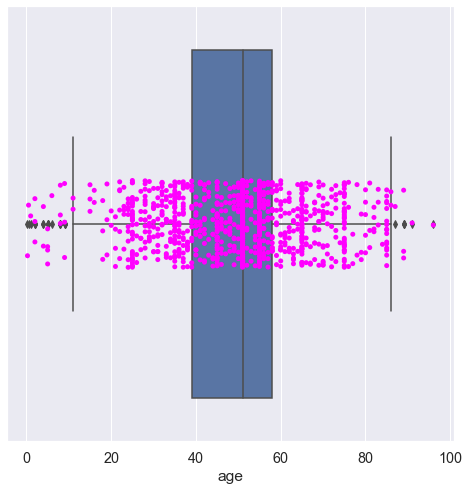

In [49]:
sns.boxplot(df['age'])
sns.stripplot(df['age'],color='magenta')

In [37]:
df.describe()

,age,visiting Wuhan,from Wuhan,death,recovered,infected
count,843.000000,1085.000000,1081.000000,1085.000000,1085.000000,1085.0
mean,49.483689,0.176959,0.144311,0.058065,0.146544,1.0
std,18.255334,0.381810,0.351567,0.233973,0.353814,0.0
min,0.250000,0.000000,0.000000,0.000000,0.000000,1.0
25%,35.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,51.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,64.000000,0.000000,0.000000,0.000000,0.000000,1.0
max,96.000000,1.000000,1.000000,1.000000,1.000000,1.0


C:\Users\Mohammad\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

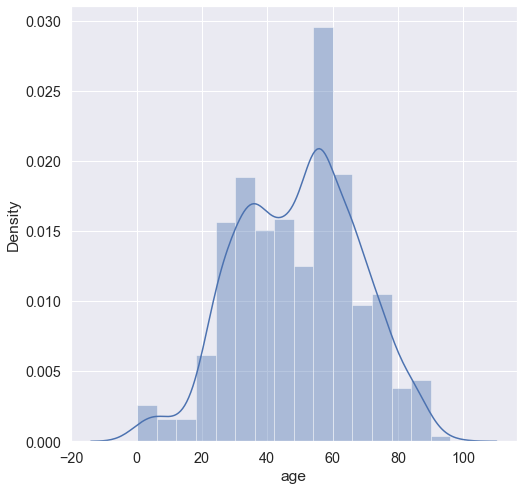

In [38]:
sns.distplot(df['age'])

C:\Users\Mohammad\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

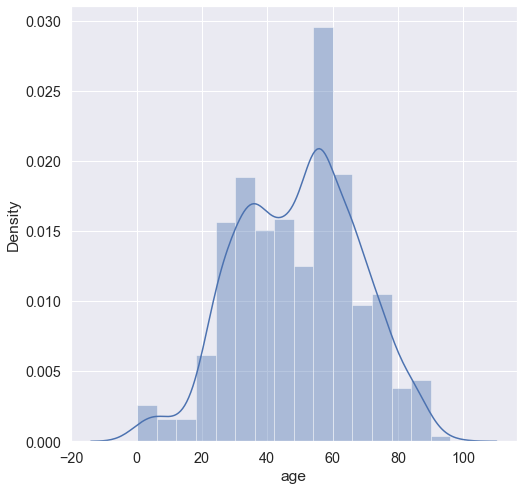

In [39]:
sns.distplot(df['age'].fillna(df['age'].mode()))

C:\Users\Mohammad\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

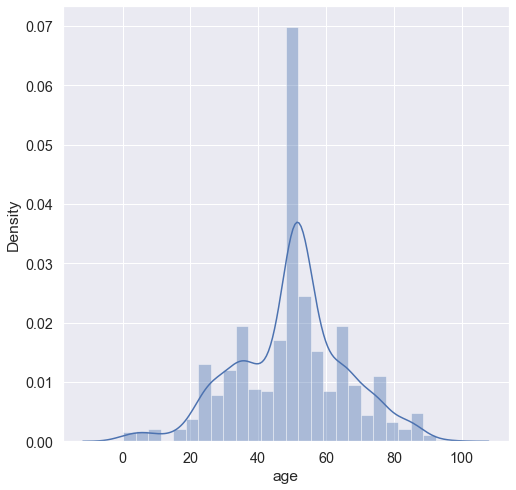

In [40]:
sns.distplot(df['age'].fillna(df['age'].median()))

### We can fill age with median cause it's closer to be normally distributed

In [41]:
df['age'].fillna(df['age'].median(),inplace=True)

In [42]:
df['age'].value_counts()

51.0    250
55.0     72
65.0     52
45.0     39
75.0     37
       ... 
1.0       1
0.5       1
87.0      1
84.0      1
91.0      1
Name: age, Length: 85, dtype: int64

In [43]:
df['gender'].mode()

0    male
dtype: object

In [44]:
df['gender'].fillna(df['gender'].mode()[0],inplace=True)

In [45]:
df['gender'].value_counts()

male      703
female    382
Name: gender, dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reporting date  1084 non-null   object 
 1   summary         1080 non-null   object 
 2   location        1085 non-null   object 
 3   country         1085 non-null   object 
 4   gender          1085 non-null   object 
 5   age             1085 non-null   float64
 6   visiting Wuhan  1085 non-null   int64  
 7   from Wuhan      1081 non-null   float64
 8   death           1085 non-null   Int64  
 9   recovered       1085 non-null   Int64  
 10  symptom         1085 non-null   object 
 11  source          1085 non-null   object 
 12  link            1085 non-null   object 
 13  infected        1085 non-null   Int64  
dtypes: Int64(3), float64(2), int64(1), object(8)
memory usage: 122.0+ KB


### It's time now to plot

C:\Users\Mohammad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Mohammad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Mohammad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='recovered', ylabel='count'>

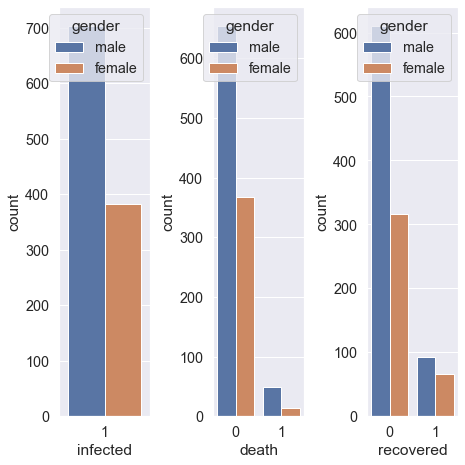

In [47]:
plt.subplot(131)
sns.countplot(df['infected'],hue=df['gender'])
plt.tight_layout(pad=4,h_pad=1)
plt.subplot(132)
sns.countplot(df['death'],hue=df['gender'])

plt.subplot(133)
sns.countplot(df['recovered'],hue=df['gender'])

### The infection,recovery and death are higher in males than females

C:\Users\Mohammad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Mohammad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='death', ylabel='count'>

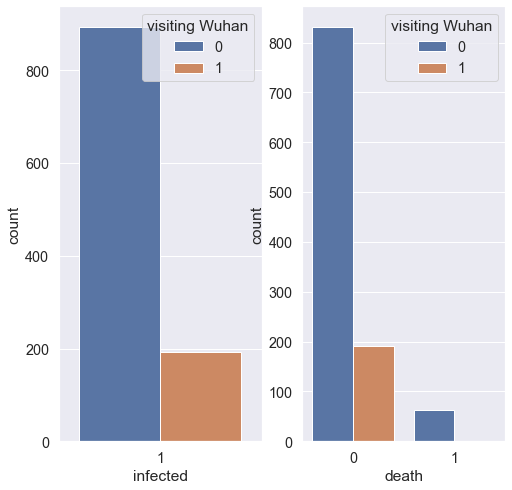

In [48]:
plt.subplot(121)
sns.countplot(df['infected'],hue=df['visiting Wuhan'])

plt.subplot(122)
sns.countplot(df['death'],hue=df['visiting Wuhan'])

### We can deduce from the plot that some of the persons who visited Wuhan got infected and almost none of them died